In [30]:
import cv2
from matplotlib import pyplot as plt
image_file = "imgs/test.png"
img = cv2.imread(image_file)

In [31]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

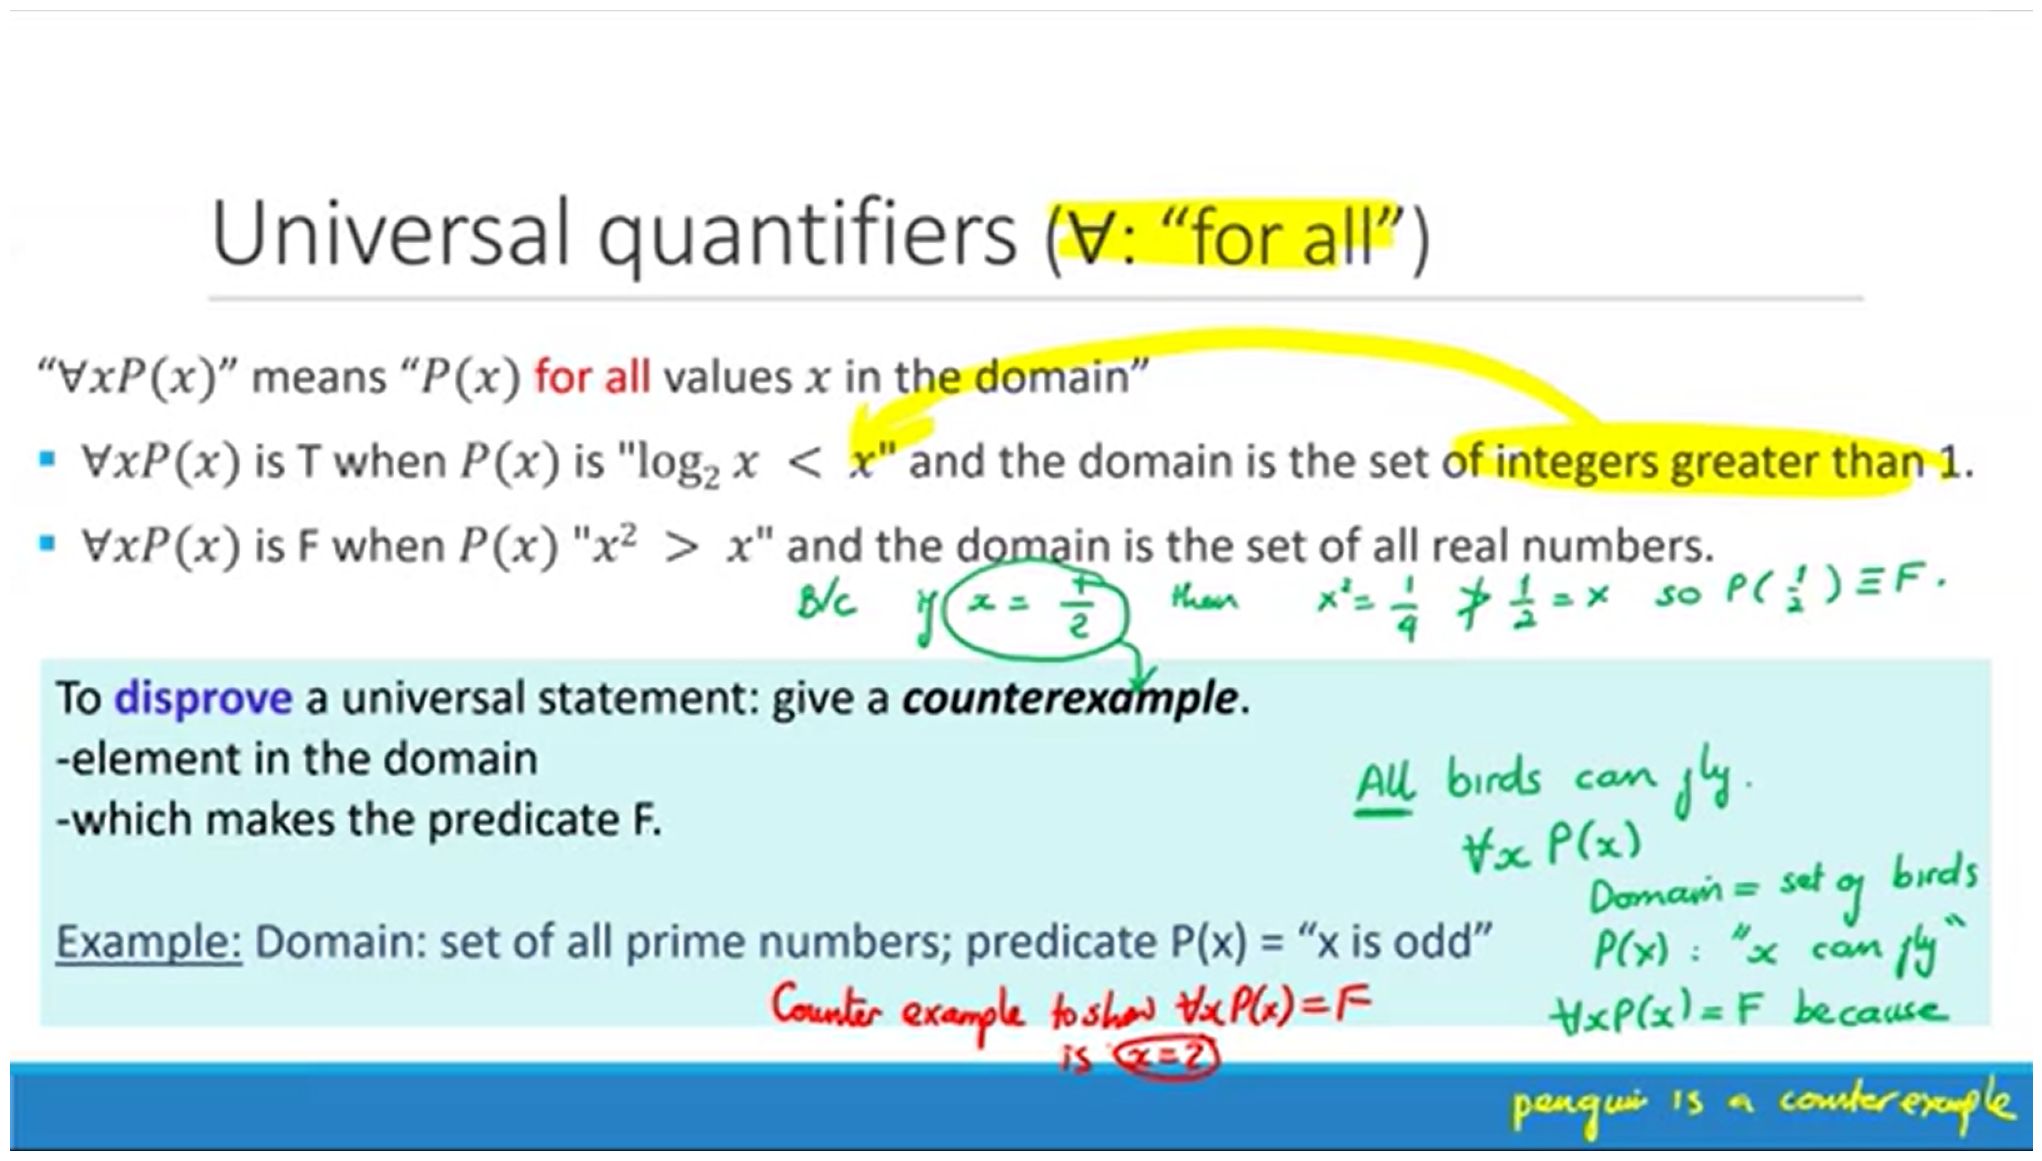

In [32]:
display(image_file)


In [33]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("imgs/inverted.jpg", inverted_image)

True

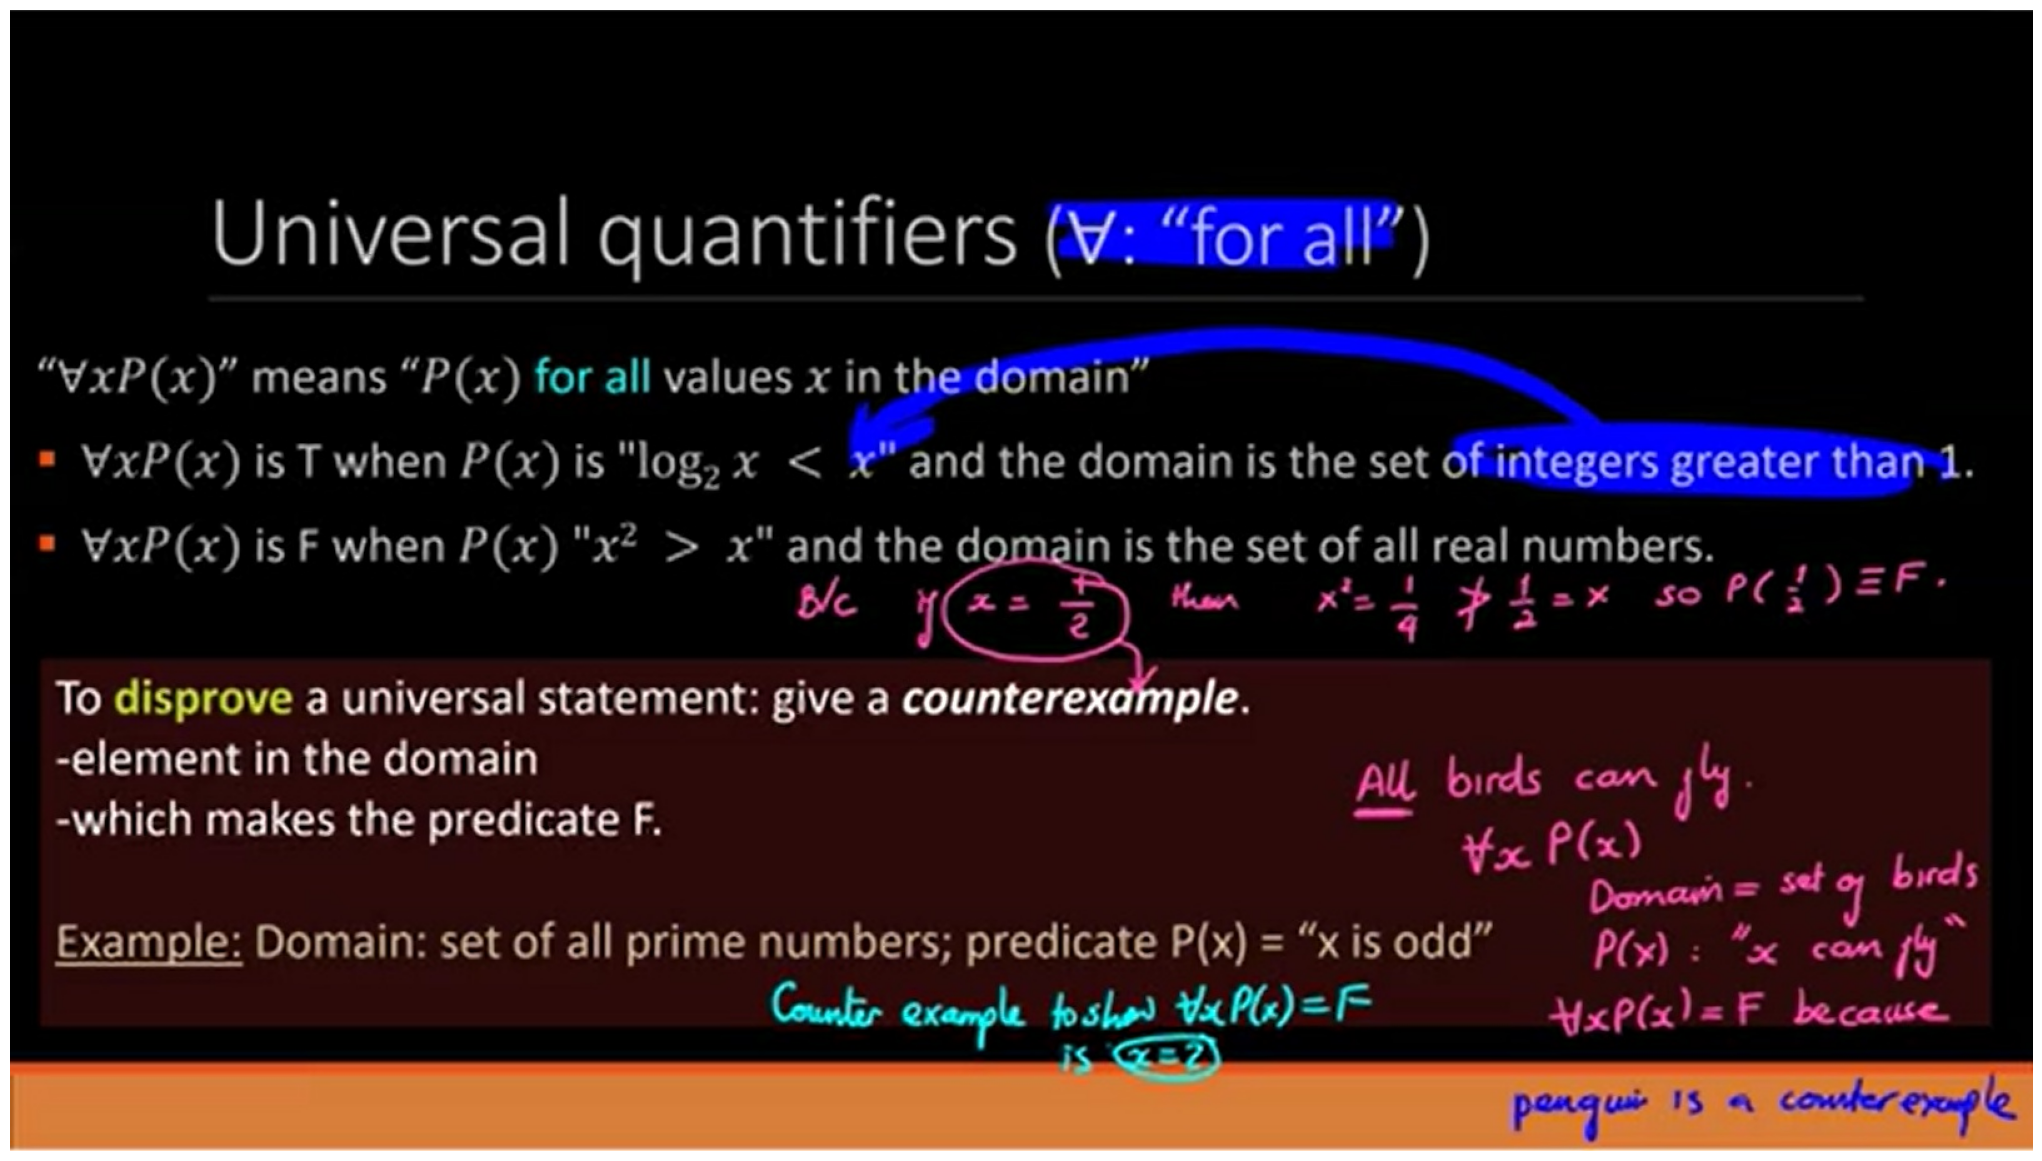

In [34]:
display("imgs/inverted.jpg")

In [35]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [36]:
gray_image = grayscale(img)
cv2.imwrite("imgs/gray.jpg", gray_image)

True

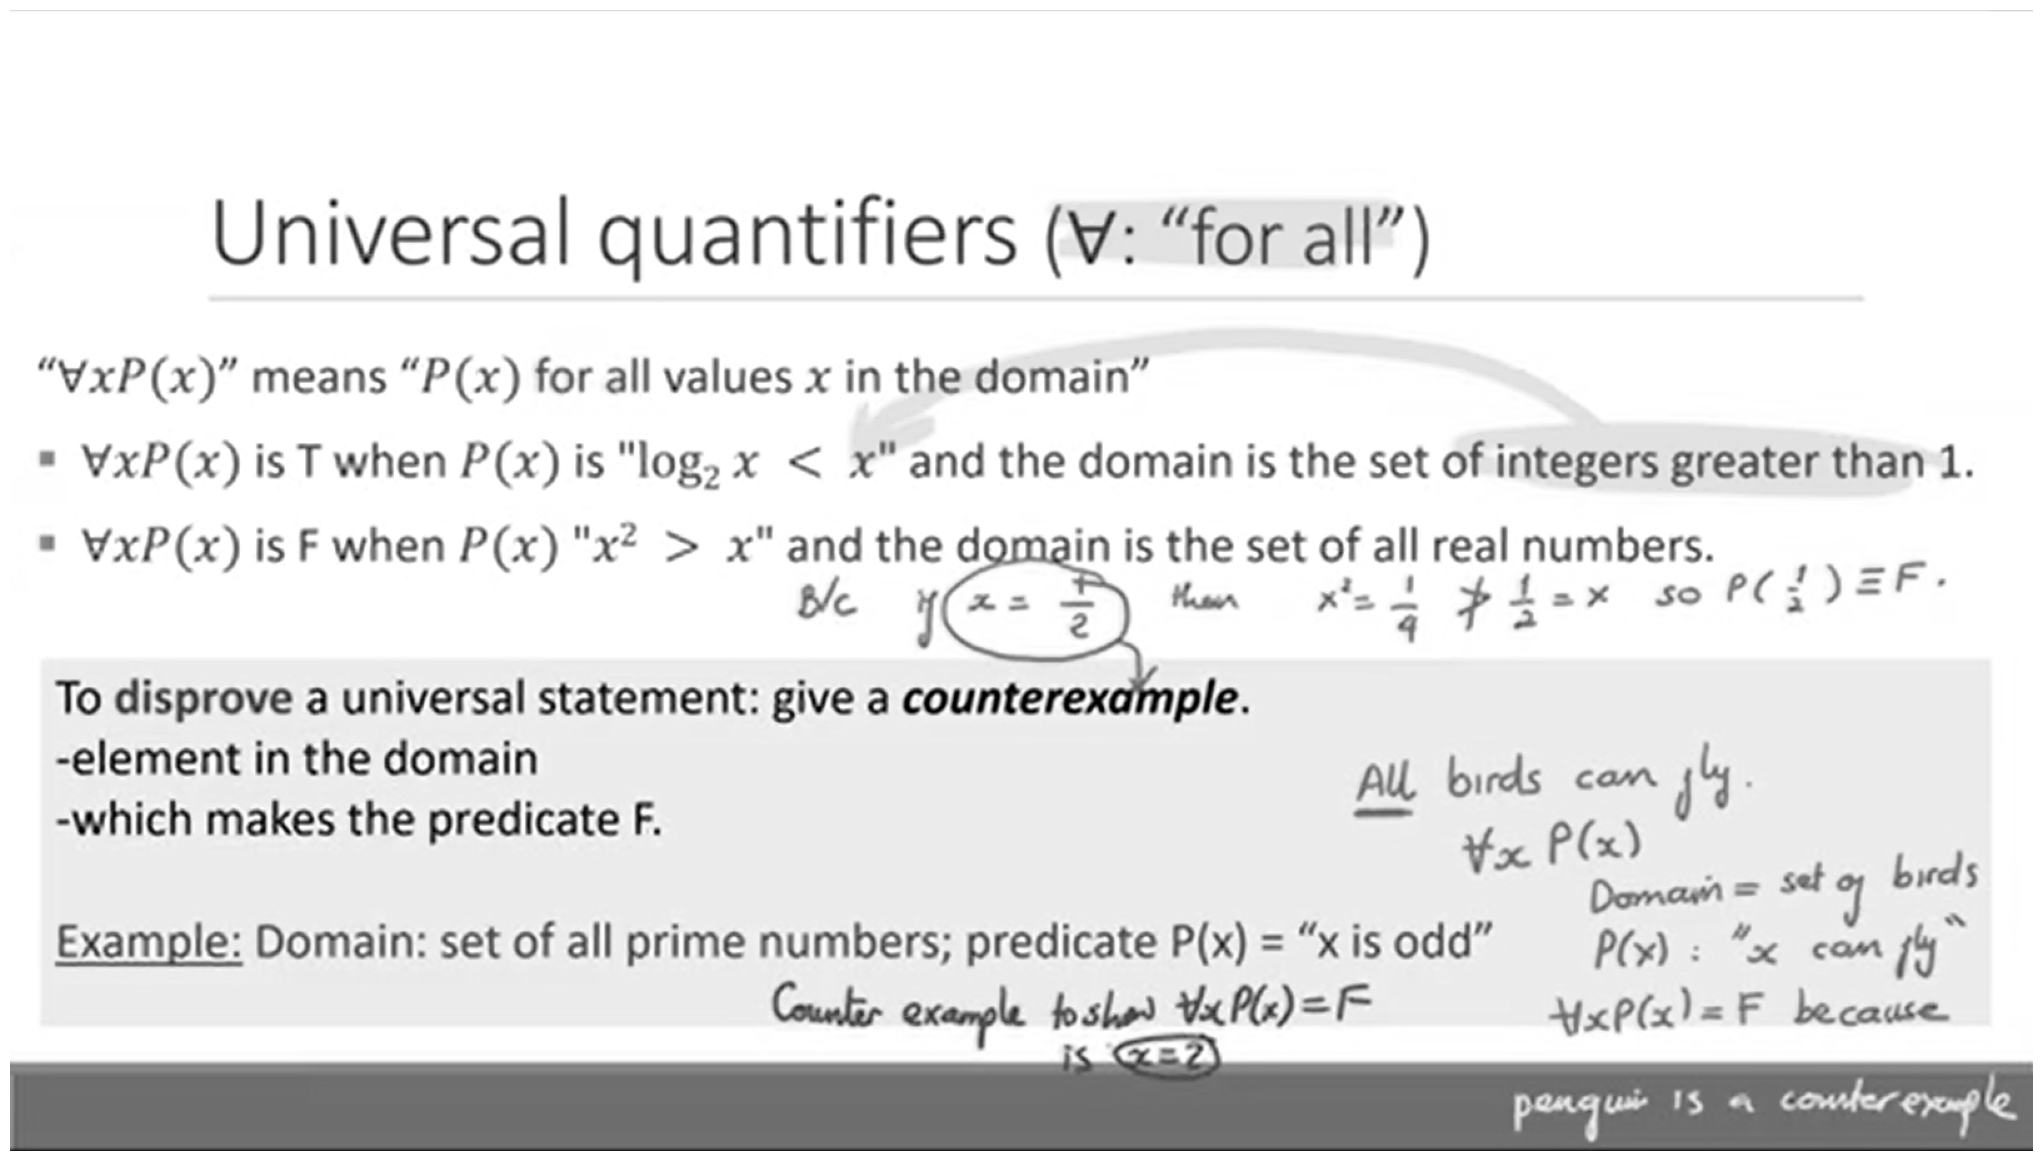

In [37]:
display("imgs/gray.jpg")

In [38]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("imgs/bw_image.jpg", im_bw)

True

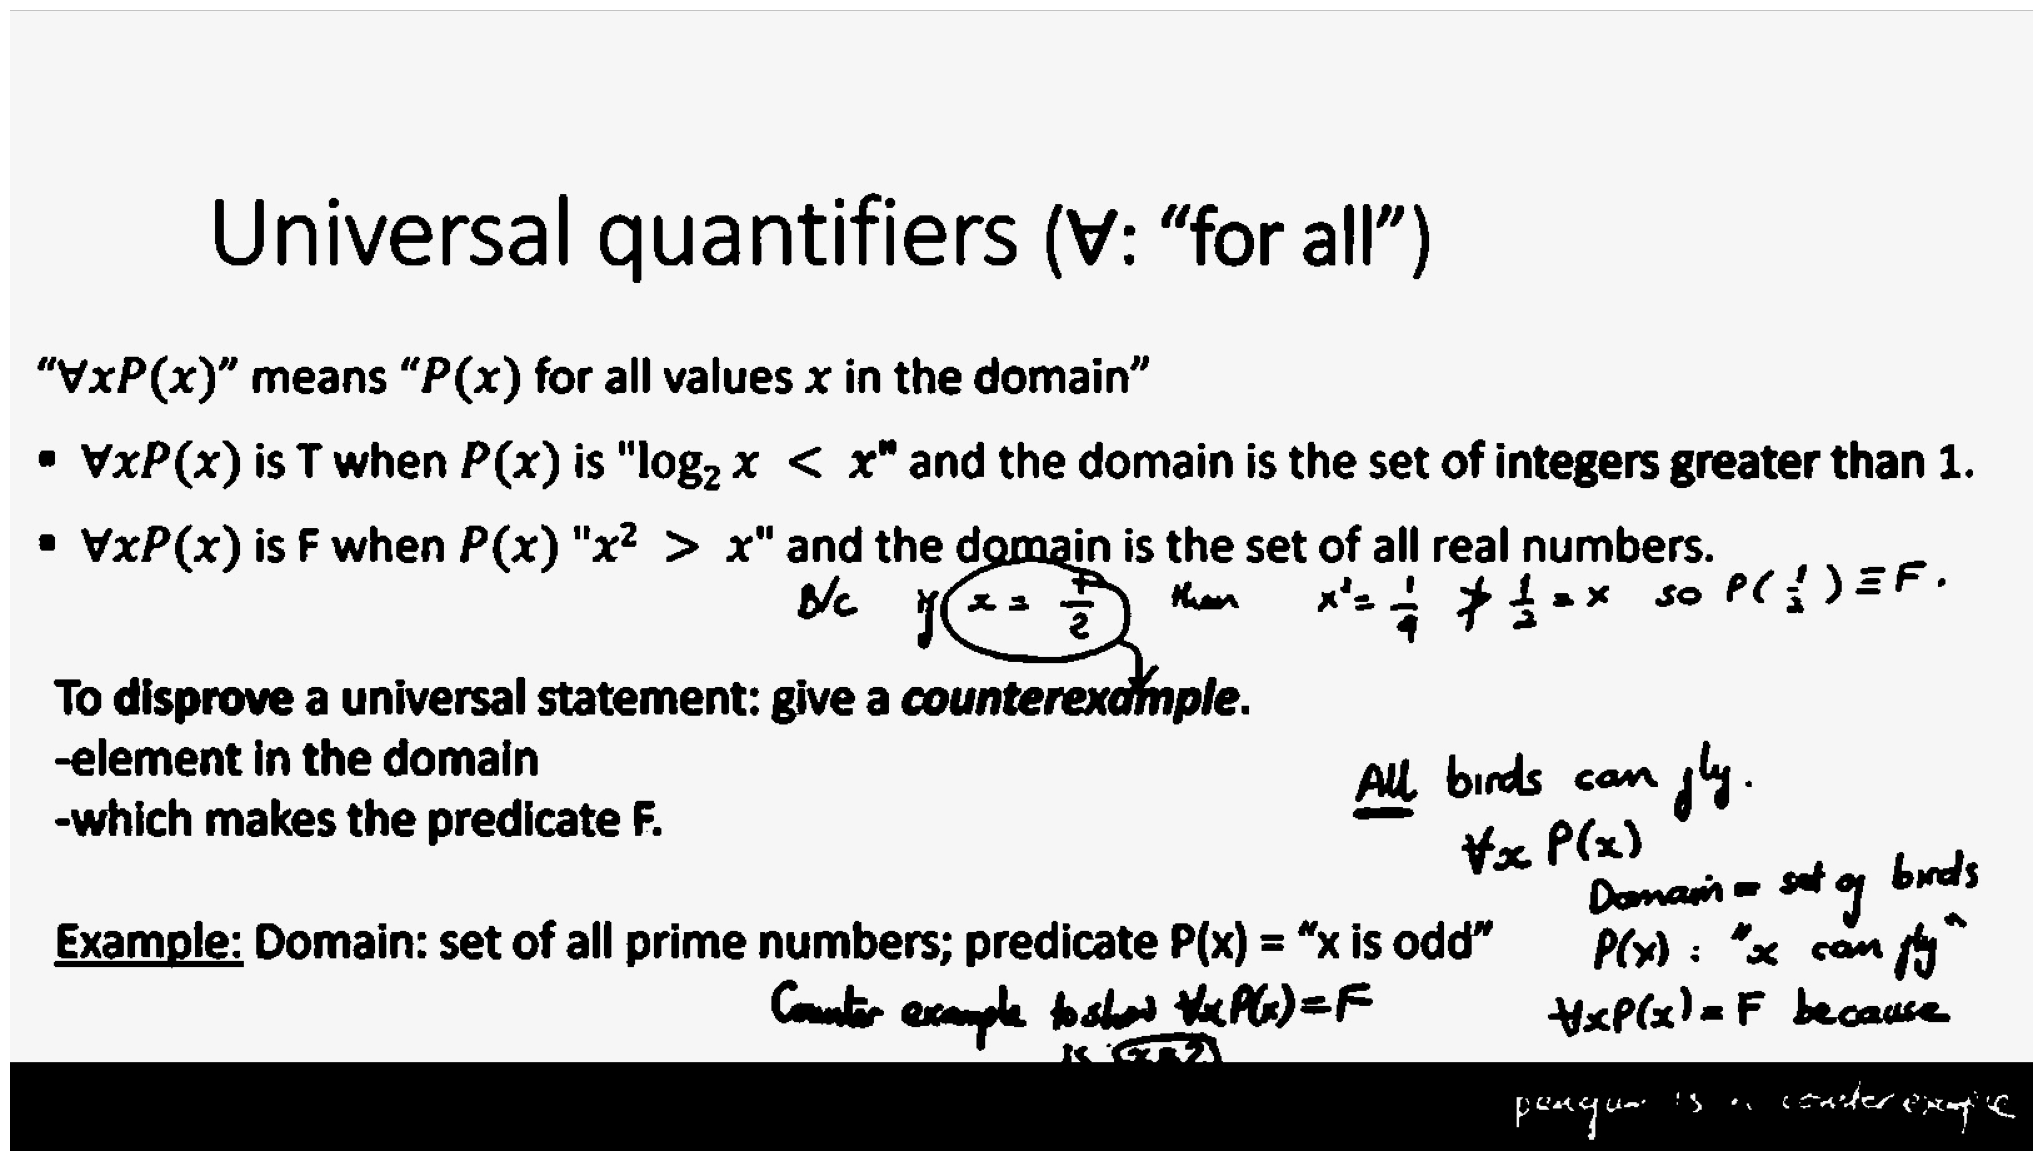

In [39]:
display("imgs/bw_image.jpg")


In [40]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [41]:
no_noise = noise_removal(im_bw)
cv2.imwrite("imgs/no_noise.jpg", no_noise)

True

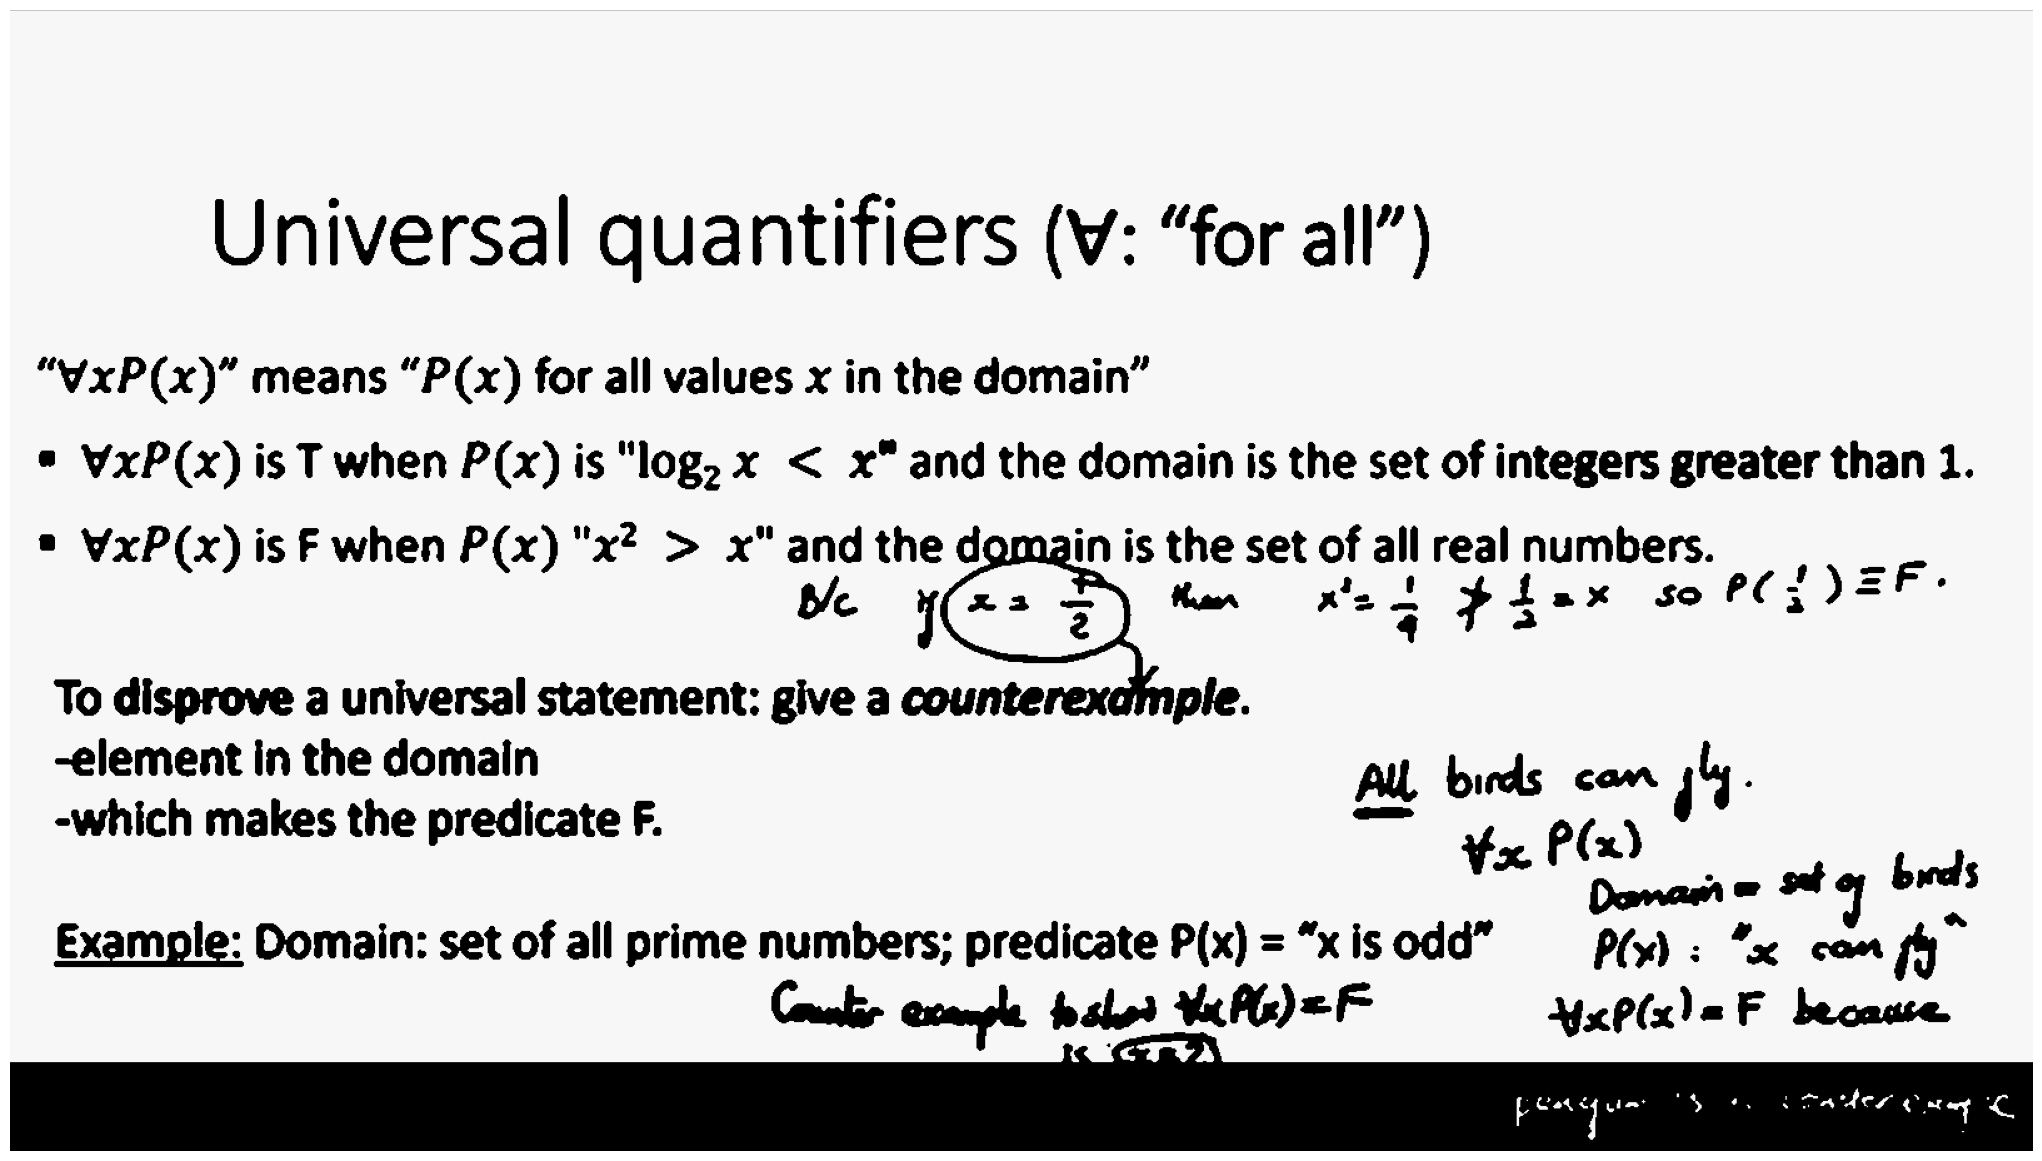

In [42]:
display("imgs/no_noise.jpg")


In [43]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [44]:
eroded_image = thin_font(no_noise)
cv2.imwrite("imgs/eroded_image.jpg", eroded_image)

True

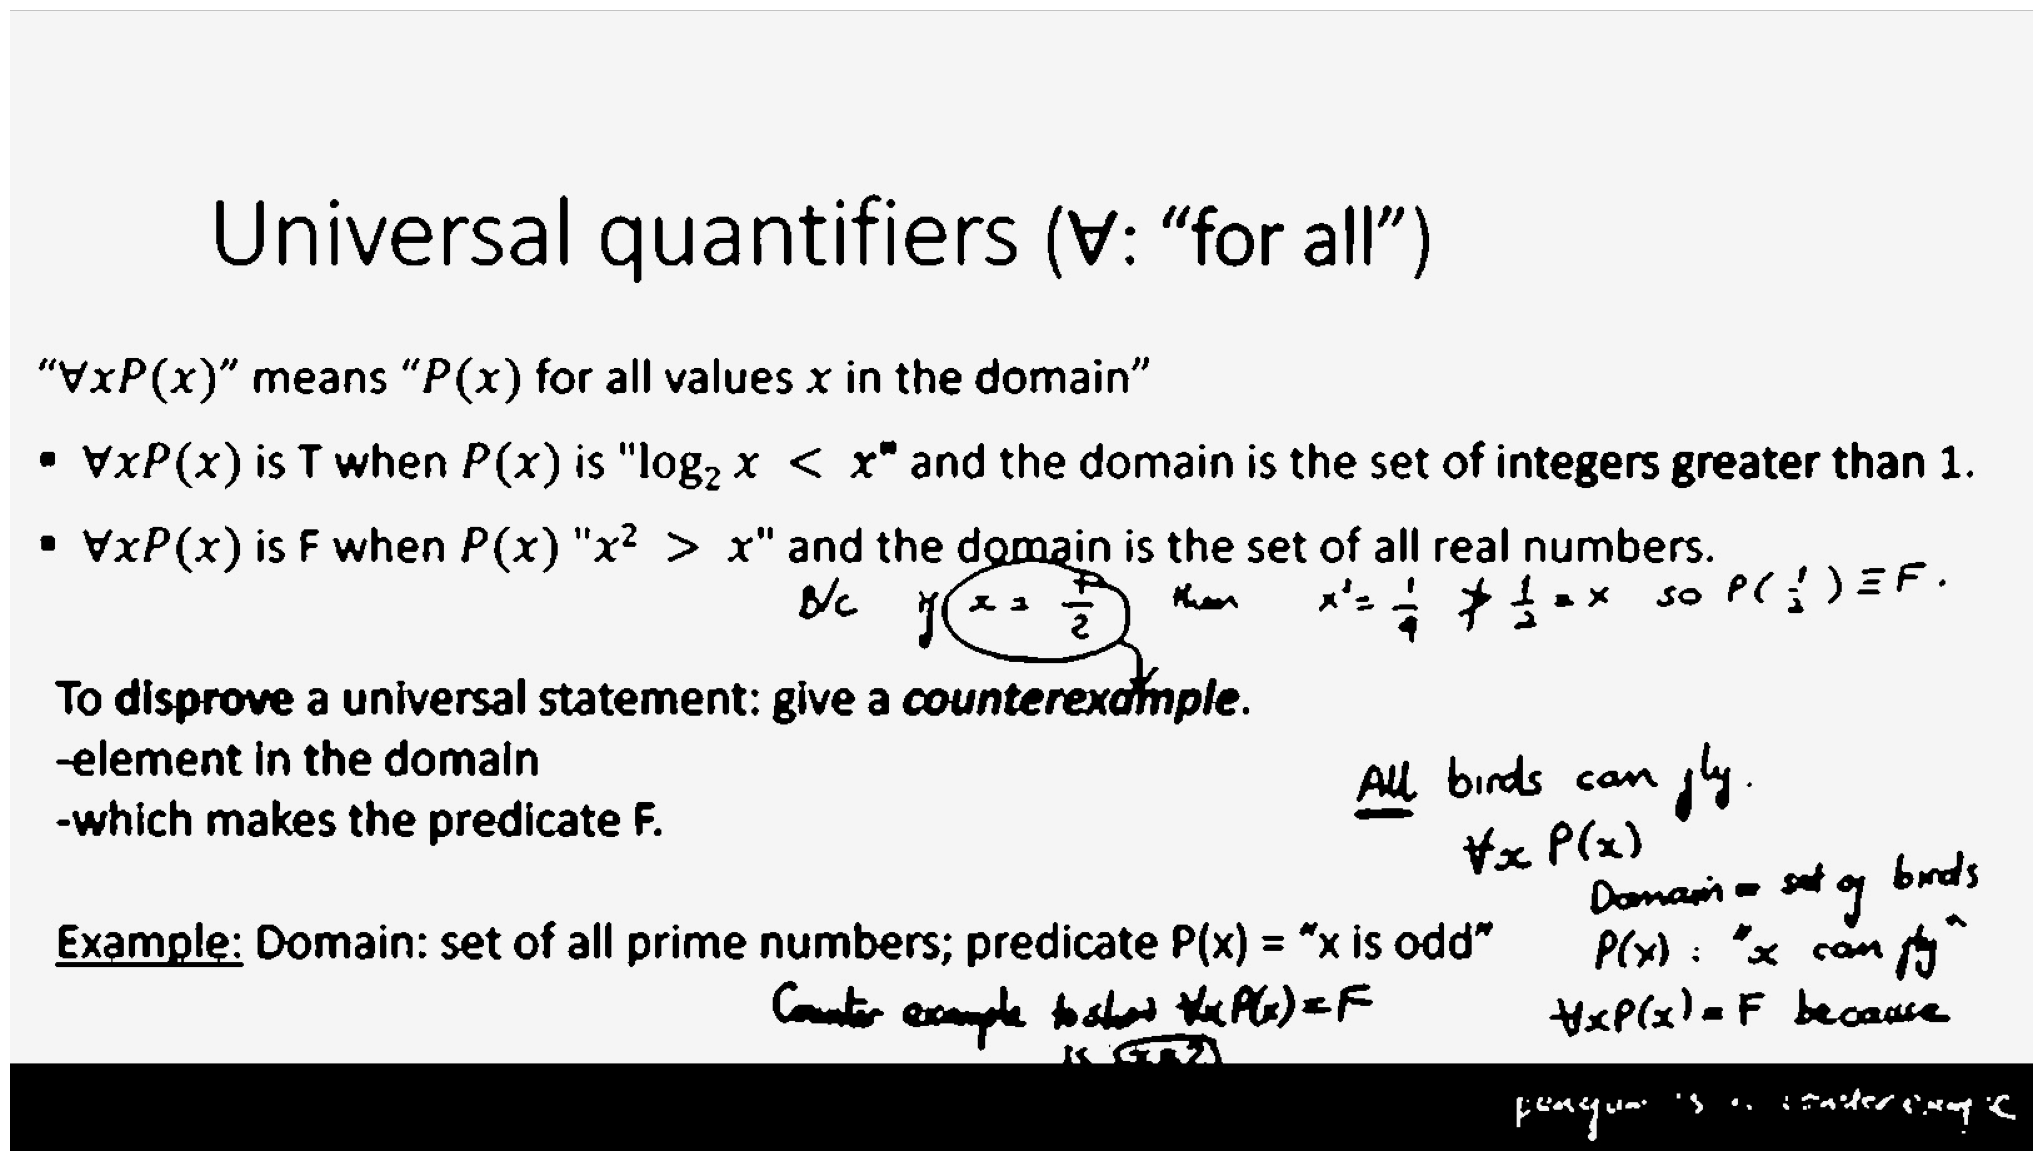

In [45]:
display("imgs/eroded_image.jpg")


In [46]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [47]:
dilated_image = thick_font(no_noise)
cv2.imwrite("imgs/dilated_image.jpg", dilated_image)

True

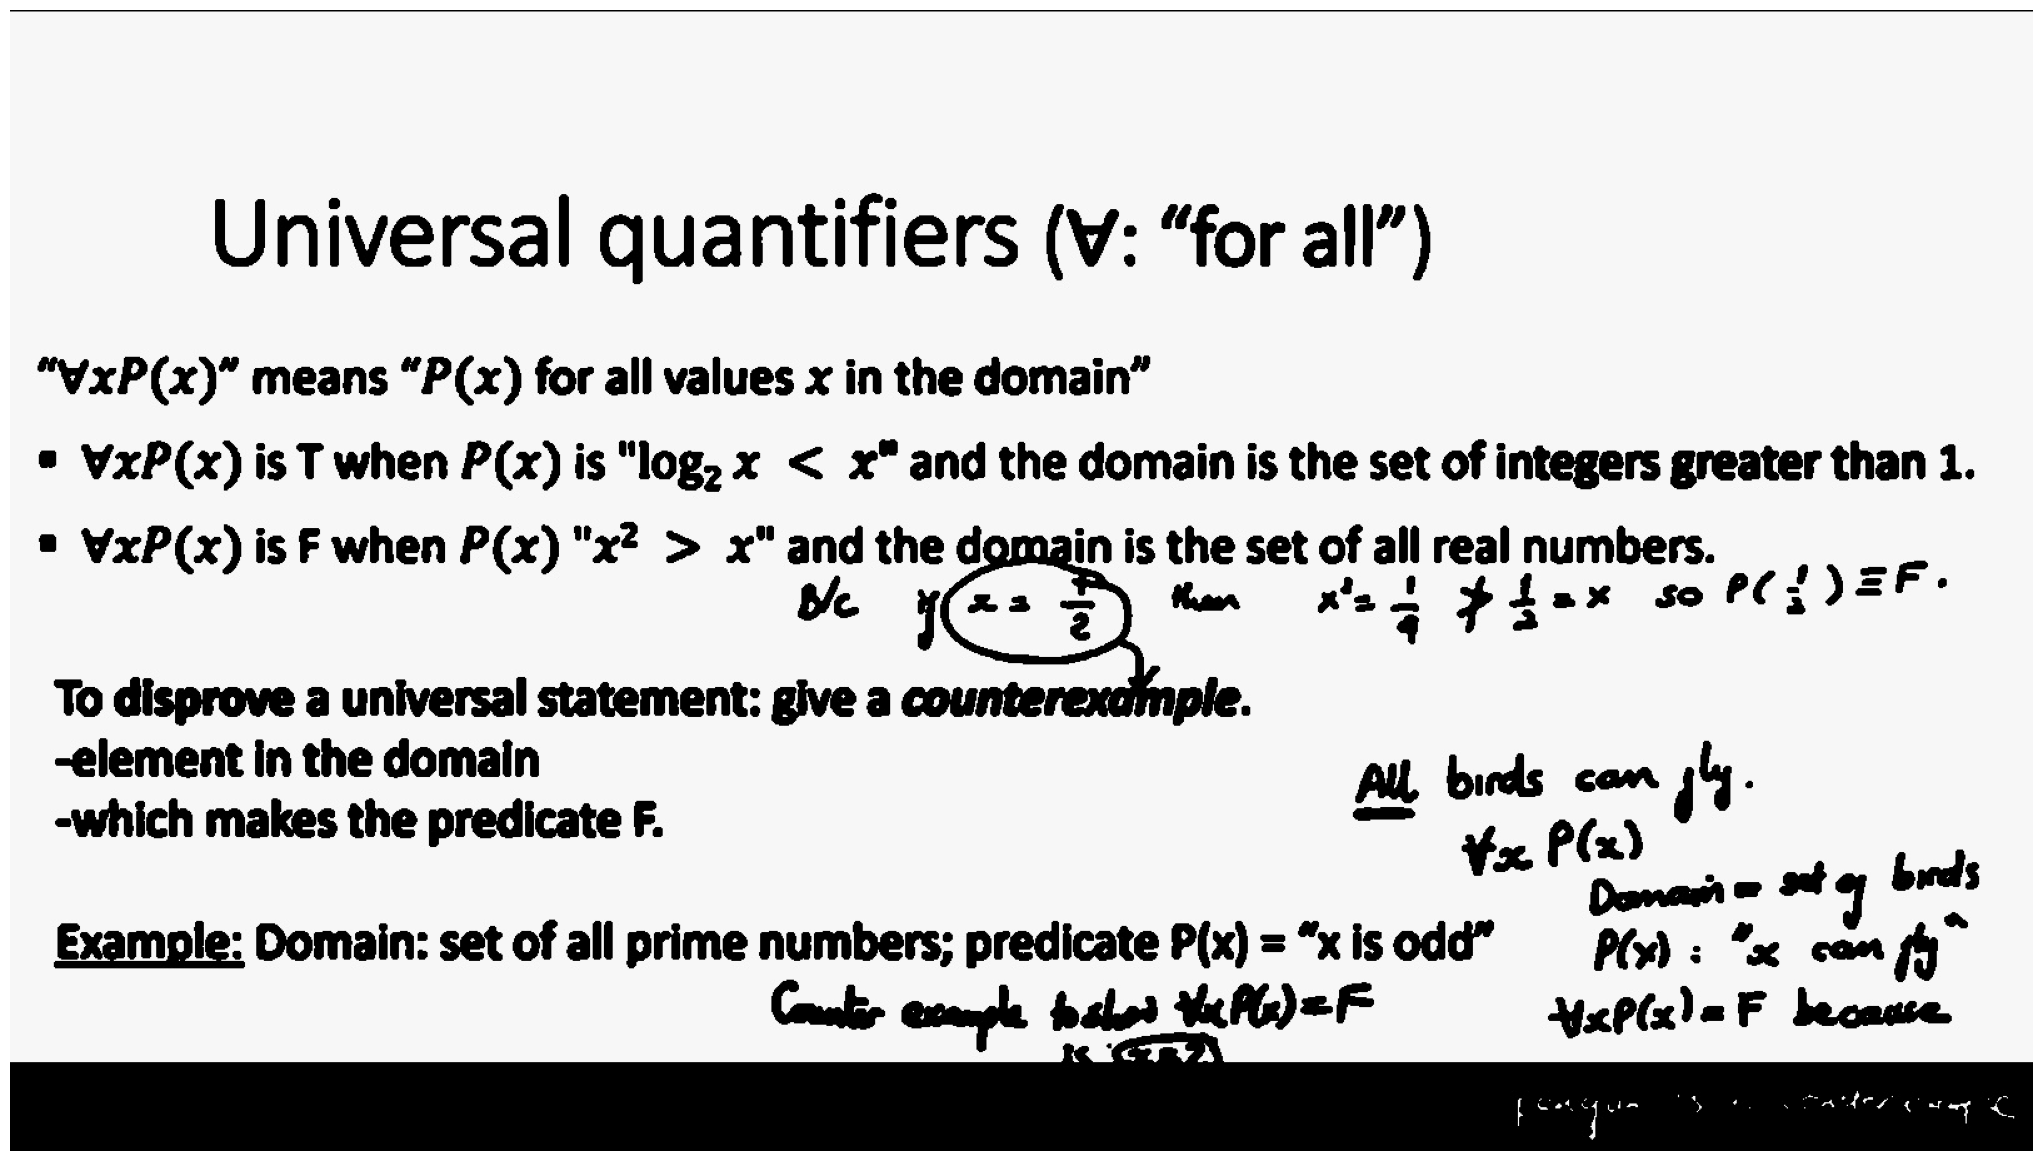

In [48]:
display("imgs/dilated_image.jpg")
